# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 04**: Data Unions & Joins Pipeline

**Date**: September 23rd 2025

**Student Name**: Jaime Antonio Contreras Barragan

**Professor**: Pablo Camarillo Ramirez

In [26]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on SparkSQL") \
    .master("spark://75bb008a135c:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

In [27]:
# Build schema
# Import your module
from jaimodule.spark_utils import SparkUtils

schema_agencies = SparkUtils.generate_schema([("agency_id", "int"), ("agency_info", "string")])
schema_brands = SparkUtils.generate_schema([("brand_id", "int"), ("brand_info", "string")])
schema_cars = SparkUtils.generate_schema([("car_id", "int"), ("car_info", "string")])
schema_customers = SparkUtils.generate_schema([("customer_id", "int"), ("customer_info", "string")])
schema_rentals = SparkUtils.generate_schema([("rental_id", "int"), ("rental_info", "string")])

df_agencies = spark.read.schema(schema_agencies).option("header", True).csv("/opt/spark/work-dir/data/car_service/agencies")
df_agencies.show(truncate=False)
df_brands = spark.read.schema(schema_brands).option("header", True).csv("/opt/spark/work-dir/data/car_service/brands")
df_brands.show(truncate=False)
df_cars = spark.read.schema(schema_cars).option("header", True).csv("/opt/spark/work-dir/data/car_service/cars")
df_cars.show(truncate=False)
df_customers = spark.read.schema(schema_customers).option("header", True).csv("/opt/spark/work-dir/data/car_service/customers")
df_customers.show(truncate=False)
df_rentals = spark.read.schema(schema_rentals).option("header", True).csv("/opt/spark/work-dir/data/car_service/rentals")
df_rentals.show(truncate=False)



+---------+-----------------------------------------------------+
|agency_id|agency_info                                          |
+---------+-----------------------------------------------------+
|1        |{'agency_name': 'NYC Rentals', 'city': 'New York'}   |
|2        |{'agency_name': 'LA Car Rental', 'city': 'Londres'}  |
|3        |{'agency_name': 'Zapopan Auto', 'city': 'Zapopan'}   |
|4        |{'agency_name': 'SF Cars', 'city': 'San Francisco'}  |
|5        |{'agency_name': 'Mexico Cars', 'city': 'Mexico City'}|
+---------+-----------------------------------------------------+

+--------+-----------------------------------------------------+
|brand_id|brand_info                                           |
+--------+-----------------------------------------------------+
|1       |{'brand_name': 'Mercedes-Benz', 'country': 'Germany'}|
|2       |{'brand_name': 'BMW', 'country': 'Germany'}          |
|3       |{'brand_name': 'Audi', 'country': 'Germany'}         |
|4       |{'bra

In [28]:
#agencies_df = agencies_df.withColumn('')

In [29]:
from pyspark.sql.functions import get_json_object
df_agencies_v2 = df_agencies.withColumn("agency_name",get_json_object("agency_info","$.agency_name")) \
                                .withColumn("city",get_json_object("agency_info","$.city")) \
                                .drop("agency_info")
df_agencies_v2.show()

+---------+-------------+-------------+
|agency_id|  agency_name|         city|
+---------+-------------+-------------+
|        1|  NYC Rentals|     New York|
|        2|LA Car Rental|      Londres|
|        3| Zapopan Auto|      Zapopan|
|        4|      SF Cars|San Francisco|
|        5|  Mexico Cars|  Mexico City|
+---------+-------------+-------------+



In [71]:
df_brands_v2 = df_brands.withColumn("brand_name",get_json_object("brand_info","$.brand_name")) \
                                .withColumn("country",get_json_object("brand_info","$.country")) \
                                .drop("brand_info")
df_brands_v2.show(n=5)

+--------+-------------+-------+
|brand_id|   brand_name|country|
+--------+-------------+-------+
|       1|Mercedes-Benz|Germany|
|       2|          BMW|Germany|
|       3|         Audi|Germany|
|       4|         Ford|     US|
|       5|          BYD|  China|
+--------+-------------+-------+
only showing top 5 rows


In [72]:
df_cars_v2 = df_cars.withColumn("car_name",get_json_object("car_info","$.car_name")) \
                            .withColumn("brand_id",get_json_object("car_info","$.brand_id").cast("int")) \
                            .withColumn("price_per_day",get_json_object("car_info","$.price_per_day").cast("int")) \
                            .drop("car_info")
df_cars_v2 = df_cars_v2.join(df_brands_v2, df_cars_v2.brand_id == df_brands_v2.brand_id).drop(df_cars_v2.brand_id)
df_cars_v2.show(n=5)

+------+--------------------+-------------+--------+----------+-------+
|car_id|            car_name|price_per_day|brand_id|brand_name|country|
+------+--------------------+-------------+--------+----------+-------+
|     1|Chang-Fisher Model 7|          139|       5|       BYD|  China|
|     2|Sheppard-Tucker M...|           70|       6|     Honda|  Japan|
|     3|Faulkner-Howard M...|           53|       3|      Audi|Germany|
|     4|  Wagner LLC Model 1|           89|       5|       BYD|  China|
|     5|  Campos PLC Model 4|          112|       4|      Ford|     US|
+------+--------------------+-------------+--------+----------+-------+
only showing top 5 rows


In [73]:
df_customers_v2 = df_customers.withColumn("customer_name",get_json_object("customer_info","$.customer_name")) \
                                    .withColumn("age",get_json_object("customer_info","$.age").cast("int")) \
                                    .withColumn("city",get_json_object("customer_info","$.city")) \
                                    .drop("customer_info")
df_customers_v2.show(n=5)

+-----------+--------------+---+-----------+
|customer_id| customer_name|age|       city|
+-----------+--------------+---+-----------+
|          1| Tiffany Riley| 32|  Monterrey|
|          2|Matthew Davies| 36|  Monterrey|
|          3|Rebecca Miller| 30|Mexico City|
|          4| Katelyn Mccoy| 34|   New York|
|          5|   Dana Dennis| 26|    Zapopan|
+-----------+--------------+---+-----------+
only showing top 5 rows


In [74]:
df_rentals_v2 = df_rentals.withColumn("car_id", get_json_object(df_rentals.rental_info, "$.car_id")) \
                .withColumn("customer_id", get_json_object(df_rentals.rental_info, "$.customer_id")) \
                .withColumn("agency_id", get_json_object(df_rentals.rental_info, "$.agency_id")) \
                .drop("rental_info")
df_rentals_v2.show(n=5)

+---------+------+-----------+---------+
|rental_id|car_id|customer_id|agency_id|
+---------+------+-----------+---------+
|    11891|    21|         71|        1|
|    11892|    11|         52|        2|
|    11893|    22|        116|        4|
|    11894|     5|        107|        1|
|    11895|     4|         53|        4|
+---------+------+-----------+---------+
only showing top 5 rows


In [69]:
df = df_rentals_v2.join(df_cars_v2, df_rentals_v2.car_id == df_cars_v2.car_id).drop(df_rentals_v2.car_id)
df = df.join(df_customers_v2, df.customer_id == df_customers_v2.customer_id).drop(df.customer_id)
df = df.join(df_agencies_v2, df.agency_id == df_agencies_v2.agency_id).drop(df.agency_id)
df.show(n=5)

+---------+------+--------------------+-------------+--------+----------+-------+-----------+--------------+---+-------------+---------+-------------+-------------+
|rental_id|car_id|            car_name|price_per_day|brand_id|brand_name|country|customer_id| customer_name|age|         city|agency_id|  agency_name|         city|
+---------+------+--------------------+-------------+--------+----------+-------+-----------+--------------+---+-------------+---------+-------------+-------------+
|      785|     1|Chang-Fisher Model 7|          139|       5|       BYD|  China|         33|    Corey Cook| 35|    Monterrey|        4|      SF Cars|San Francisco|
|      766|     1|Chang-Fisher Model 7|          139|       5|       BYD|  China|         96| Laura Gregory| 25|      Londres|        2|LA Car Rental|      Londres|
|      762|     1|Chang-Fisher Model 7|          139|       5|       BYD|  China|        149|   Blake Jones| 25|  Mexico City|        3| Zapopan Auto|      Zapopan|
|      757

# Final DF

In [75]:
final_df=final_df.select("rental_id","car_name","customer_name","agency_name")
final_df.show()

+---------+--------------------+-----------------+-------------+
|rental_id|            car_name|    customer_name|  agency_name|
+---------+--------------------+-----------------+-------------+
|      785|Chang-Fisher Model 7|       Corey Cook|      SF Cars|
|      766|Chang-Fisher Model 7|    Laura Gregory|LA Car Rental|
|      762|Chang-Fisher Model 7|      Blake Jones| Zapopan Auto|
|      757|Chang-Fisher Model 7|   Nicholas Kline|  NYC Rentals|
|      747|Chang-Fisher Model 7|    Melissa Flynn|LA Car Rental|
|      735|Chang-Fisher Model 7|     Joseph Jones|  NYC Rentals|
|      672|Chang-Fisher Model 7|    Melissa Flynn|      SF Cars|
|      669|Chang-Fisher Model 7|   Susan Ferguson|      SF Cars|
|      662|Chang-Fisher Model 7|  Raymond Navarro|LA Car Rental|
|      654|Chang-Fisher Model 7|   Sherry Simpson|LA Car Rental|
|      617|Chang-Fisher Model 7| Jenny Richardson|LA Car Rental|
|      615|Chang-Fisher Model 7|  Jennifer Torres|LA Car Rental|
|      591|Chang-Fisher M

In [64]:
!pwd
!cd ..
!pwd
!ls -l data

/opt/spark/work-dir/labs/lab04
/opt/spark/work-dir/labs/lab04
ls: cannot access 'data': No such file or directory


# Parquet file

In [65]:
final_df.printSchema()

root
 |-- rental_id: integer (nullable = true)
 |-- car_name: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- agency_name: string (nullable = true)



In [66]:
base_path = "/opt/spark/work-dir/data/"
final_df.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .parquet( base_path + "car_service/output/parquet")

In [68]:
!ls -l /opt/spark/work-dir/data/car_service/output/parquet/
!du -sh /opt/spark/work-dir/data/car_service/output/parquet/

total 0
drwxr-xr-x 1 root root 4096 Sep 26 14:12 'agency_name=LA Car Rental'
drwxr-xr-x 1 root root 4096 Sep 26 14:12 'agency_name=NYC Rentals'
drwxr-xr-x 1 root root 4096 Sep 26 14:12 'agency_name=SF Cars'
drwxr-xr-x 1 root root 4096 Sep 26 14:12 'agency_name=Zapopan Auto'
-rw-r--r-- 1 root root    0 Sep 26 14:12  _SUCCESS
112K	/opt/spark/work-dir/data/car_service/output/parquet/


# CSV files

In [77]:
final_df.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .option("header", True) \
            .csv(base_path + "car_service/output/csv")

In [78]:
!du -sh /opt/spark/work-dir/data/car_service/output/csv/

832K	/opt/spark/work-dir/data/car_service/output/csv/


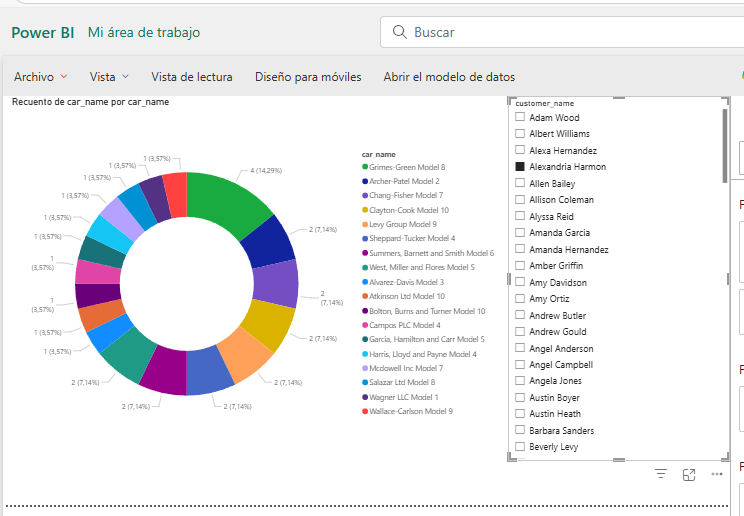

In [79]:
sc.stop()